# Trabalho Prático 1

## Importando bibliotecas e preparando dados

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss

In [ ]:
dados = pd.read_csv('data_tp1', header=None).dropna()

X = dados.loc[:, 1:].values
y = dados.loc[:, 0].values

X_train, X_test, y_train, y_test = train_test_split(X,y)

In [ ]:
tamanhos_hidden = [25,50,100]
tamanhos_batch = [len(y_train), 1, 10, 50]
taxas_aprendizado = [0.5, 1, 10]

### Função que calcula o erro empírico e esperado do modelo
Para plotar a convergência do erro empírico, com o extra de mostrar também do erro esperado, implementou-se a função a seguir que treina o modelo época por época com a função partial_fit() e salva em vetores os erros de cada uma.

In [ ]:
def calcula_loss(X_train, y_train, X_test, y_test, tamanho_hidden=25, tamanho_batch=None, taxa_aprendizado=0.5, epocas=100):
    if tamanho_batch == None:
        tamanho_batch = len(y_train)

    modelo = MLPClassifier(hidden_layer_sizes = (tamanho_hidden), activation='logistic', solver='sgd', learning_rate_init=taxa_aprendizado,
                           batch_size=tamanho_batch, random_state=123)

    loss_treino = []
    loss_teste = []
    for e in range(epocas):
        modelo.partial_fit(X_train, y_train, list(range(10)))
        loss_treino.append(log_loss(y_train, modelo.predict_proba(X_train)))
        loss_teste.append(log_loss(y_test, modelo.predict_proba(X_test)))
    return loss_treino, loss_teste

## Gradient Descent

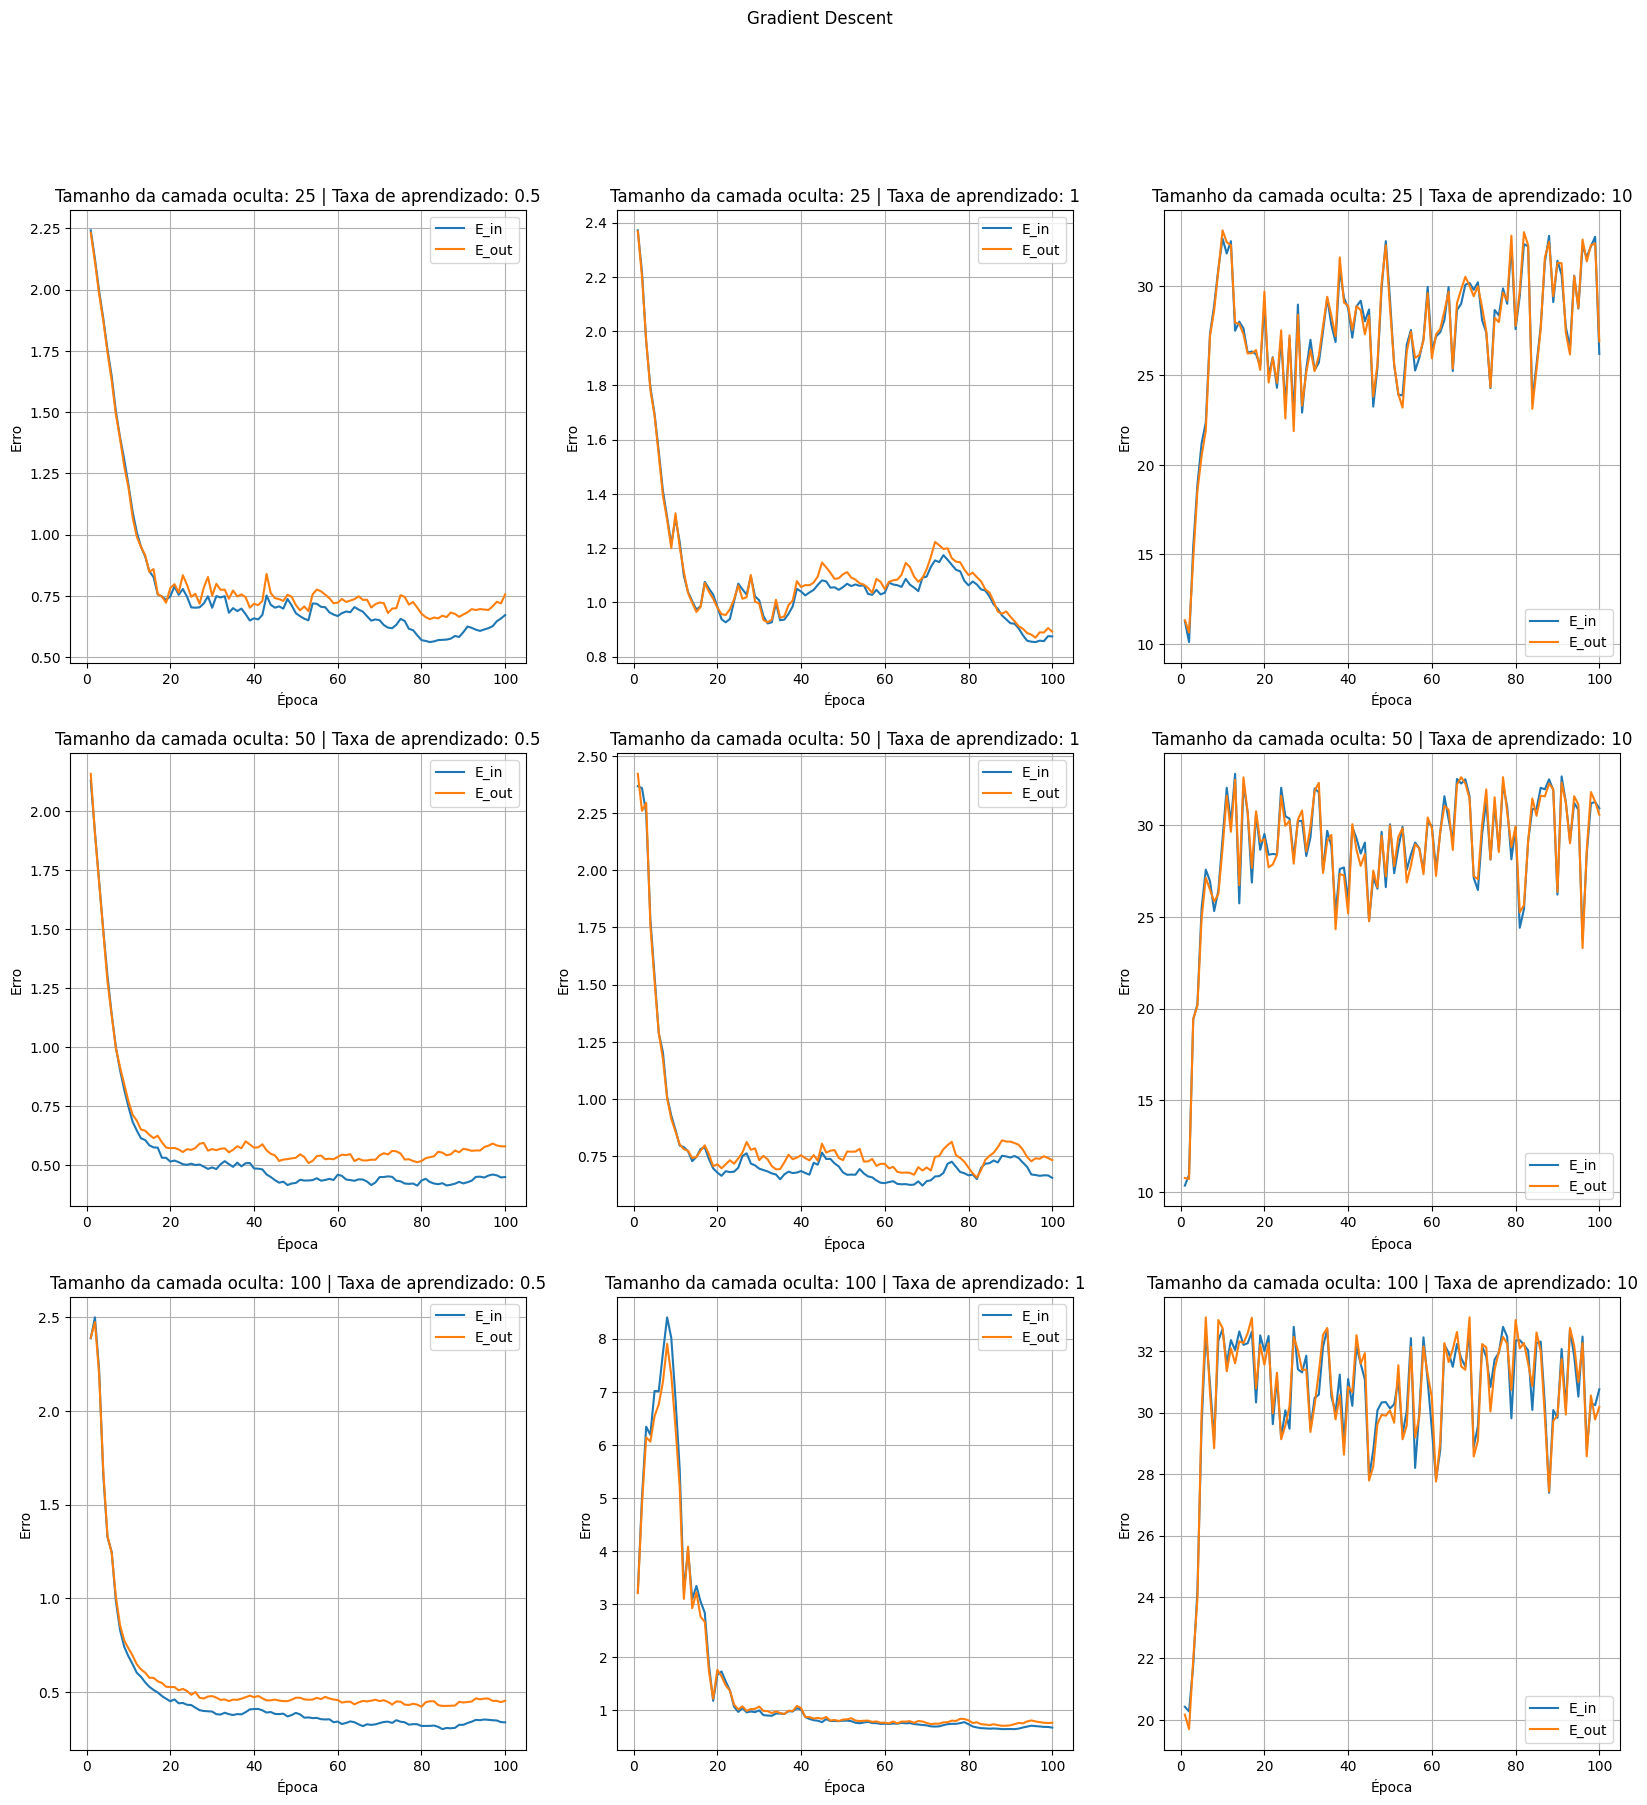

In [ ]:
fig, axs = plt.subplots(3, 3, figsize=(20,20))
fig.suptitle('Gradient Descent')
eixo_x = list(range(1, 101))

for i in range(3):
    for j in range(3):
        erro_treino, erro_teste = calcula_loss(X_train, y_train, X_test, y_test, tamanho_hidden=tamanhos_hidden[i], taxa_aprendizado=taxas_aprendizado[j], tamanho_batch=tamanhos_batch[0])

        axs[i,j].plot(eixo_x, erro_treino, label='E_in')
        axs[i,j].plot(eixo_x, erro_teste, label='E_out')

        axs[i,j].set_xlabel('Época')
        axs[i,j].set_ylabel('Erro')
        axs[i,j].set_title('Tamanho da camada oculta: '+str(tamanhos_hidden[i])+' | Taxa de aprendizado: '+str(taxas_aprendizado[j]))

        axs[i,j].legend()
        axs[i,j].grid()

### Análise
O que chama mais atenção nos gráficos de modelos utilizando Gradient Descent é a diferença tanto na instabilidade quanto na escala dos erros com taxa de aprendizado igual à 10 em relação às mais baixas. É o esperado, já que 10 é uma taxa extremamente alta. Isso pode fazer com que os parâmetros do modelo oscilem drasticamente, já que os gradientes calculados a partir da função de perda para atualizar os parâmetros do modelo multiplicados por essa taxa podem resultar em atualizações muito grandes, o que pode dificultar que o modelo alcance uma solução estável e, em vez disso, fazer com que o modelo continue oscilando indefinidamente. Essa instabilidade está menos presente nos gráficos com taxa de aprendizado 0.5, os quais tiveram também erros finais menores, indicando que a taxa menor é a mais adequada para os modelos, embora ainda tenham aspecto de taxa de aprendizado um pouco alta.



## Stochastic Gradient Descent

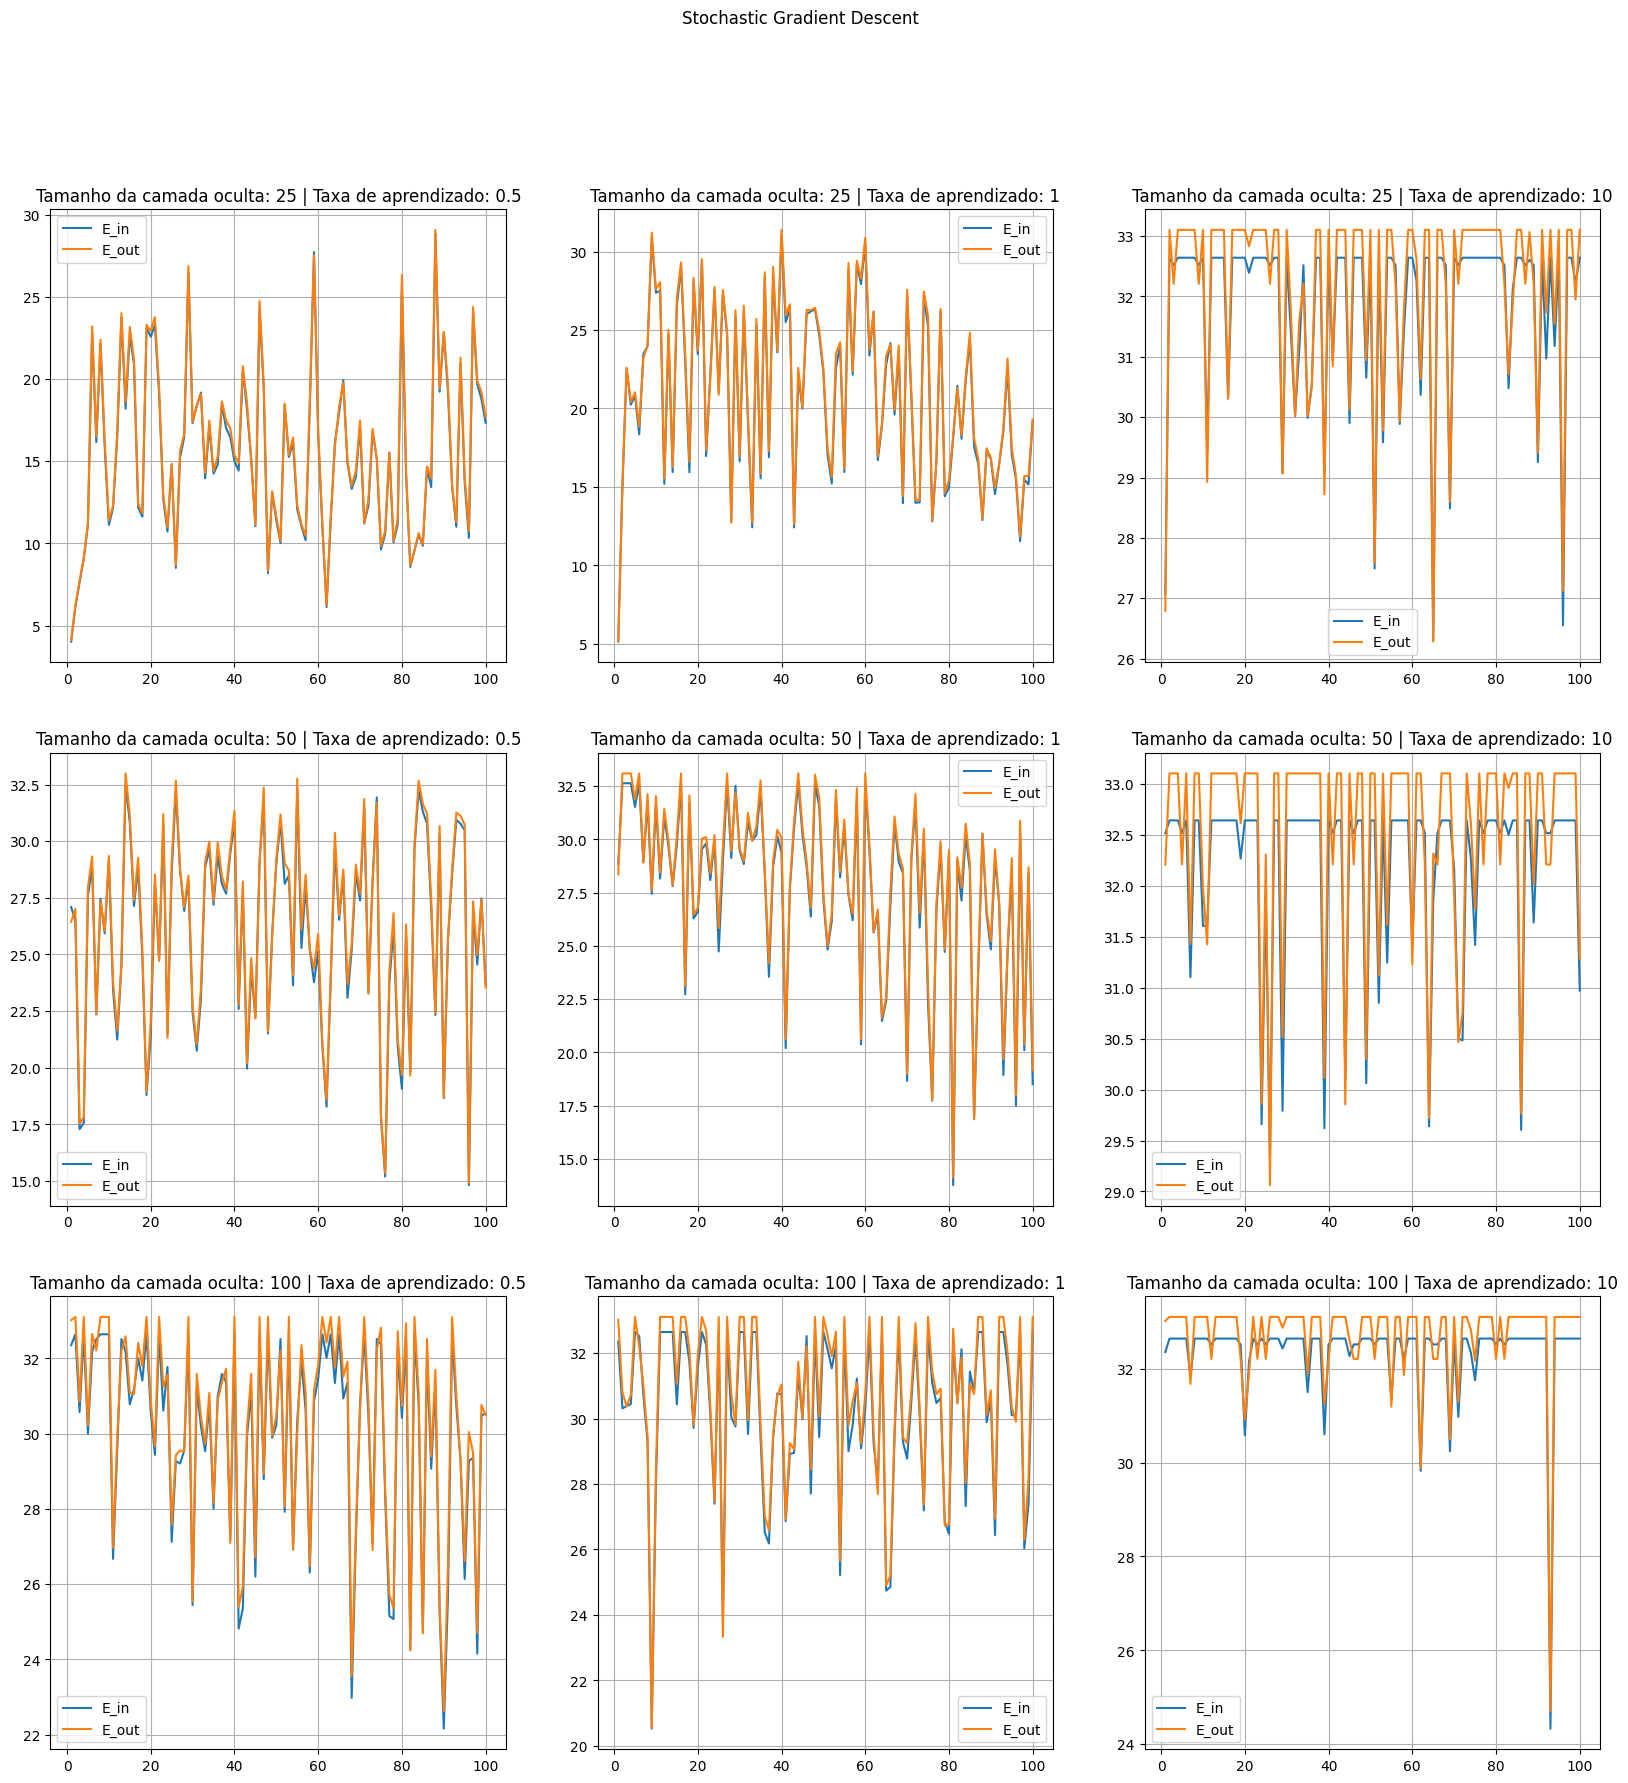

In [ ]:
fig, axs = plt.subplots(3, 3, figsize=(20,20))
fig.suptitle('Stochastic Gradient Descent')
eixo_x = list(range(1, 101))

for i in range(3):
    for j in range(3):
        erro_treino, erro_teste = calcula_loss(X_train, y_train, X_test, y_test, tamanho_hidden=tamanhos_hidden[i], taxa_aprendizado=taxas_aprendizado[j],
                                               tamanho_batch=tamanhos_batch[1])

        axs[i,j].plot(eixo_x, erro_treino, label='E_in')
        axs[i,j].plot(eixo_x, erro_teste, label='E_out')

        axs[i,j].set_title('Tamanho da camada oculta: '+str(tamanhos_hidden[i])+' | Taxa de aprendizado: '+str(taxas_aprendizado[j]))

        axs[i,j].legend()
        axs[i,j].grid()

### Análise
É clara a piora dos gráficos de Gradient Descent para Stochastic Gradient Descent. Os erros foram bem maiores e também oscilaram bem mais, resultando em gráficos muito ruins para todas as combinações de parâmetros. A razão disso pode ser que o Stochastic Gradient Descent tende a funcionar melhor uma taxa de aprendizado menor que do Gradient Descent, por obter a estimativa do gradiente a cada entrada e, logo, variações mais significativas, ruídos e incertezas, o que uma taxa de aprendizado menor suaviza nas atualizações dos parâmetros. Assim, uma taxa de aprendizado razoavelmente boa no Gradient Descent, como 0.5, pode ser muito pior no Stochastic Gradient Descent.

## Mini-Batch
### De tamanho 10

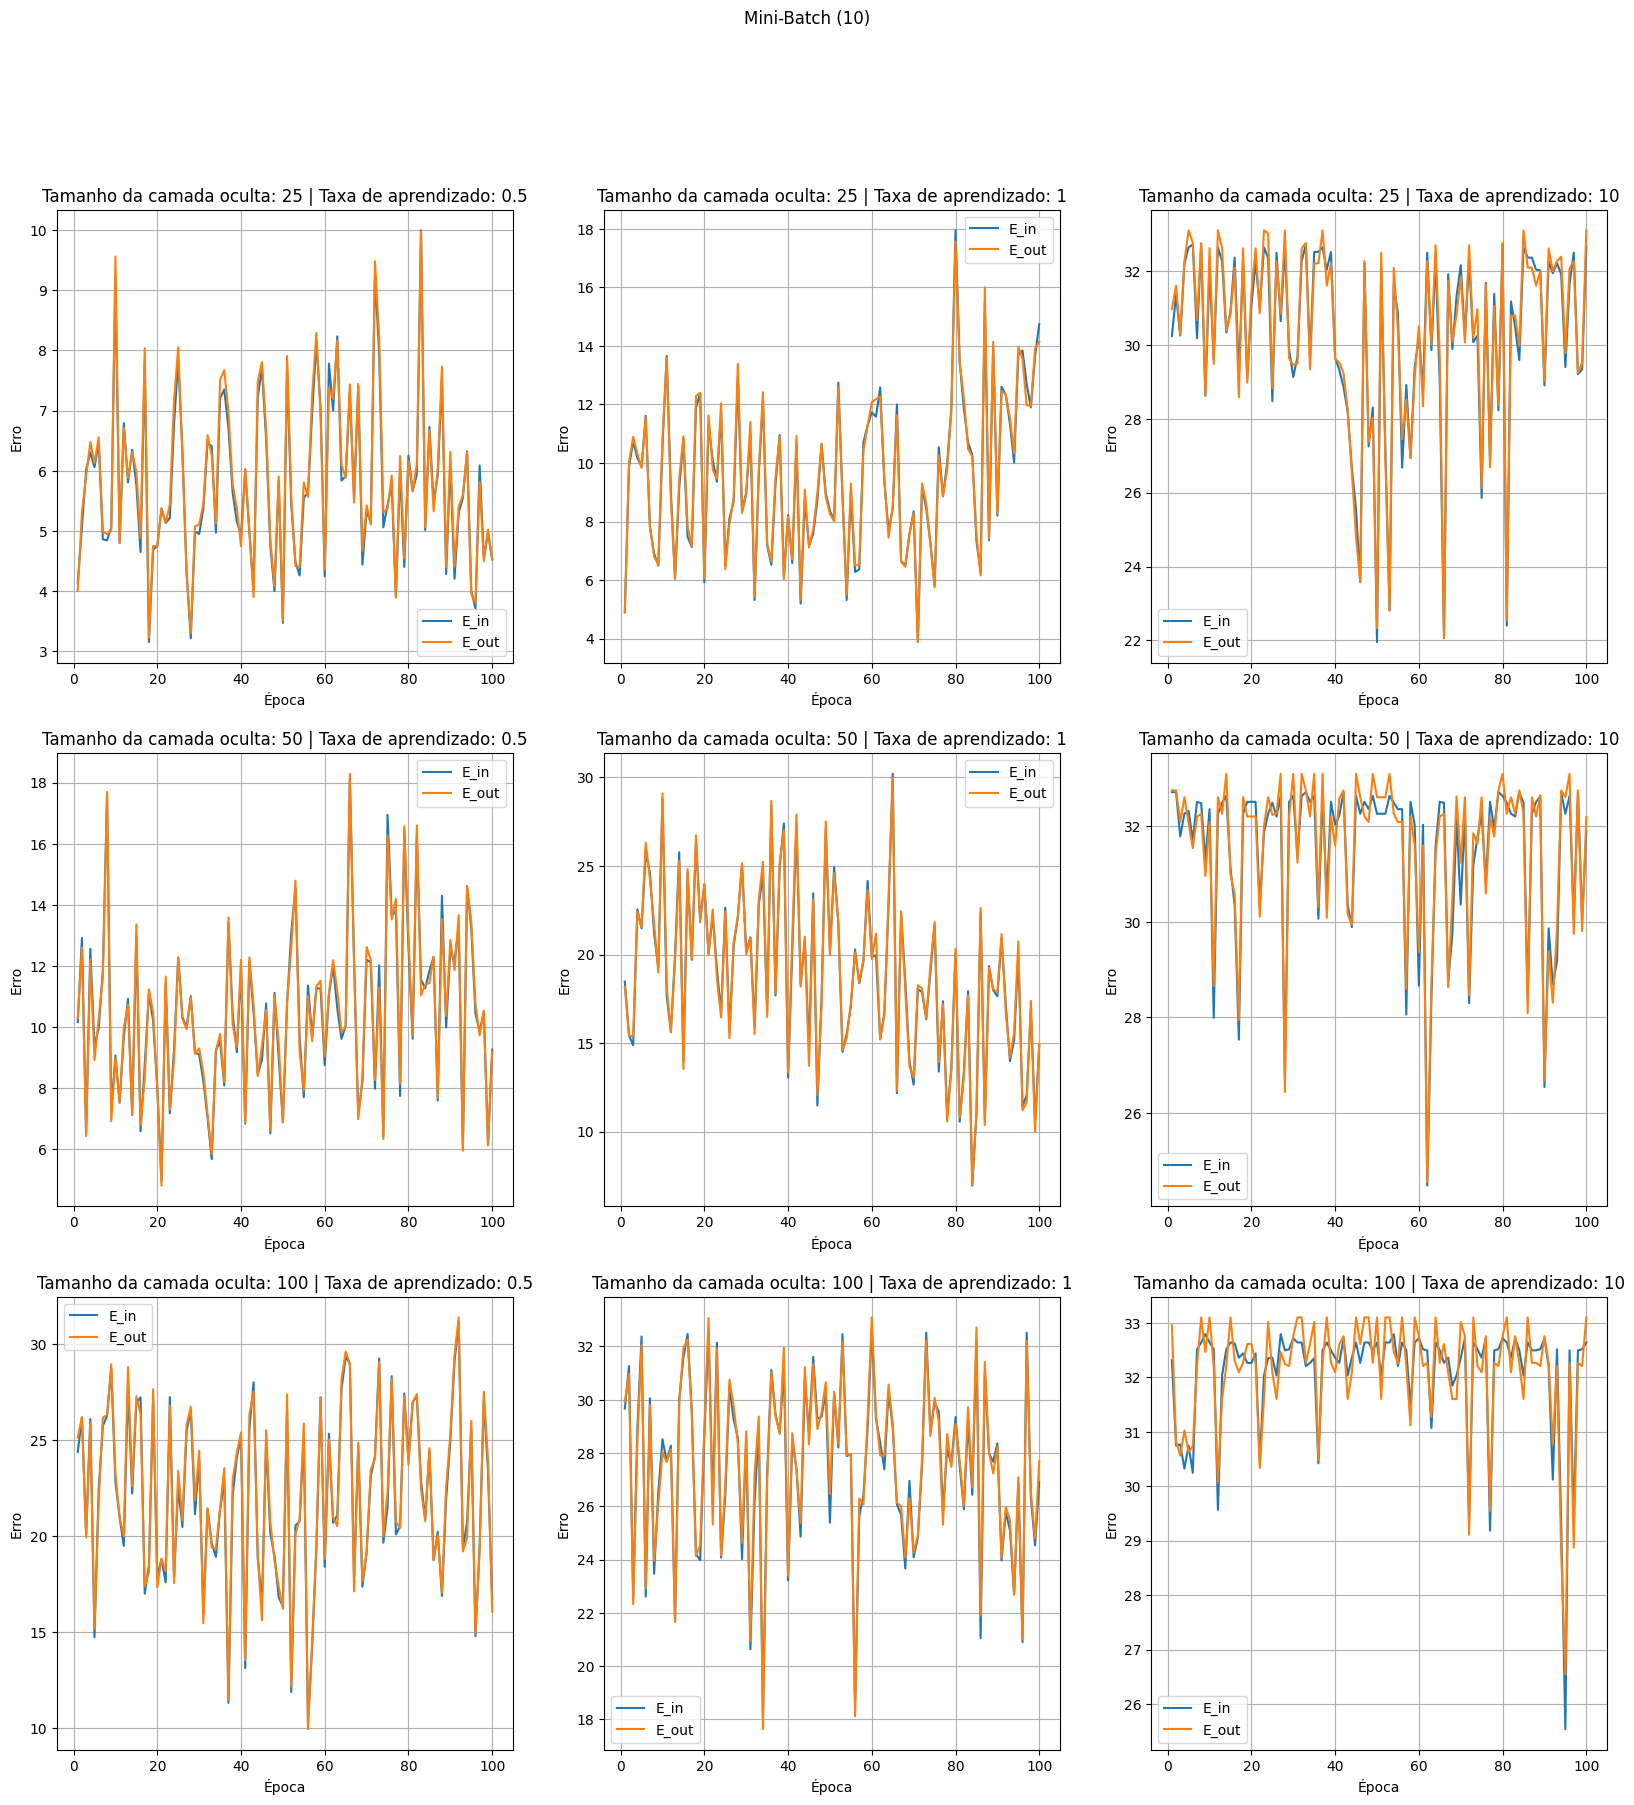

In [ ]:
fig, axs = plt.subplots(3, 3, figsize=(20,20))
fig.suptitle('Mini-Batch (10)')
eixo_x = list(range(1, 101))

for i in range(3):
    for j in range(3):
        erro_treino, erro_teste = calcula_loss(X_train, y_train, X_test, y_test, tamanho_hidden=tamanhos_hidden[i], taxa_aprendizado=taxas_aprendizado[j],
                                               tamanho_batch=tamanhos_batch[2])

        axs[i,j].plot(eixo_x, erro_treino, label='E_in')
        axs[i,j].plot(eixo_x, erro_teste, label='E_out')

        axs[i,j].set_xlabel('Época')
        axs[i,j].set_ylabel('Erro')
        axs[i,j].set_title('Tamanho da camada oculta: '+str(tamanhos_hidden[i])+' | Taxa de aprendizado: '+str(taxas_aprendizado[j]))

        axs[i,j].legend()
        axs[i,j].grid()

### De tamanho 50

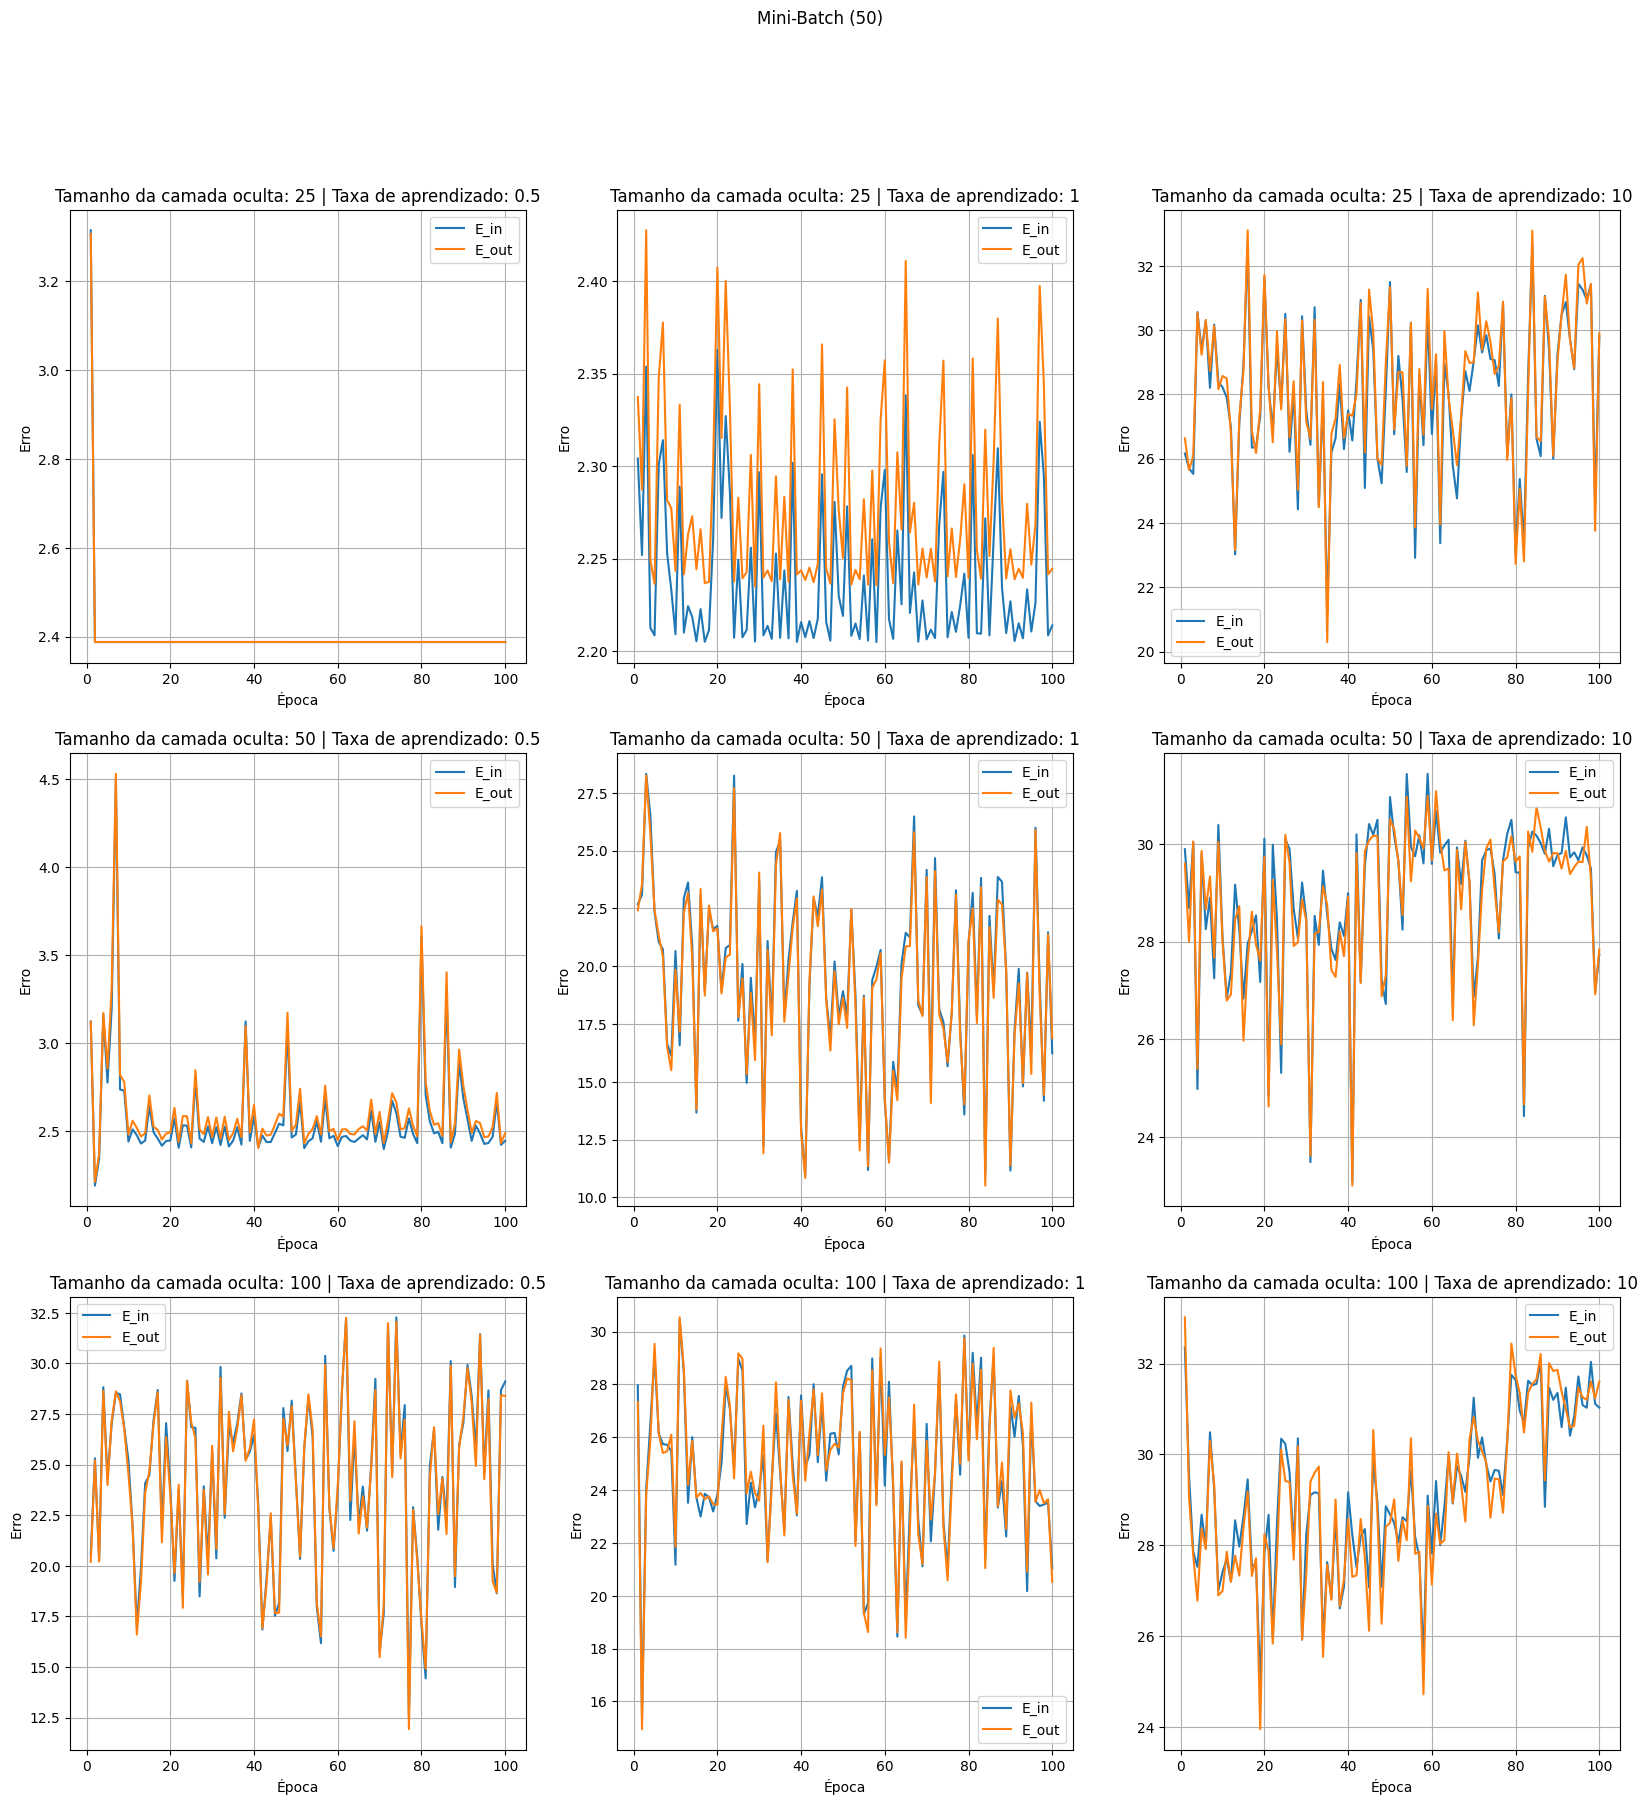

In [ ]:
fig, axs = plt.subplots(3, 3, figsize=(20,20))
fig.suptitle('Mini-Batch (50)')
eixo_x = list(range(1, 101))

for i in range(3):
    for j in range(3):
        erro_treino, erro_teste = calcula_loss(X_train, y_train, X_test, y_test, tamanho_hidden=tamanhos_hidden[i], taxa_aprendizado=taxas_aprendizado[j],
                                               tamanho_batch=tamanhos_batch[3])

        axs[i,j].plot(eixo_x, erro_treino, label='E_in')
        axs[i,j].plot(eixo_x, erro_teste, label='E_out')

        axs[i,j].set_xlabel('Época')
        axs[i,j].set_ylabel('Erro')
        axs[i,j].set_title('Tamanho da camada oculta: '+str(tamanhos_hidden[i])+' | Taxa de aprendizado: '+str(taxas_aprendizado[j]))

        axs[i,j].legend()
        axs[i,j].grid()

### Análise
Assim como em Stochastic Gradient Descent, os Mini-Batches tendem a funcionar melhor uma taxa de aprendizado menor que do Gradient Descent, por obterem a estimativa do gradiente de um subconjunto da entrada, e não ela inteira. Isso pode causar tanto a instabilidade, como na maioria dos gráficos, devido a maior vulnerabilidade a ruídos e variação na atualização dos parâmetros.

## Plots com taxa de aprendizado 0.0001
Como nos plots anteriores a taxa de aprendizado estava muito ruim para a grande maioria dos gráficos, ficou difícil fazer análises relacionadas ao tamanho da camada oculta. Assim, plotou-se a seguir, para cada quantidade de neurônios e cada algoritmo de cálculo de gradiente, os erros empiricos e esperados com taxa de aprendizado 0.0001.

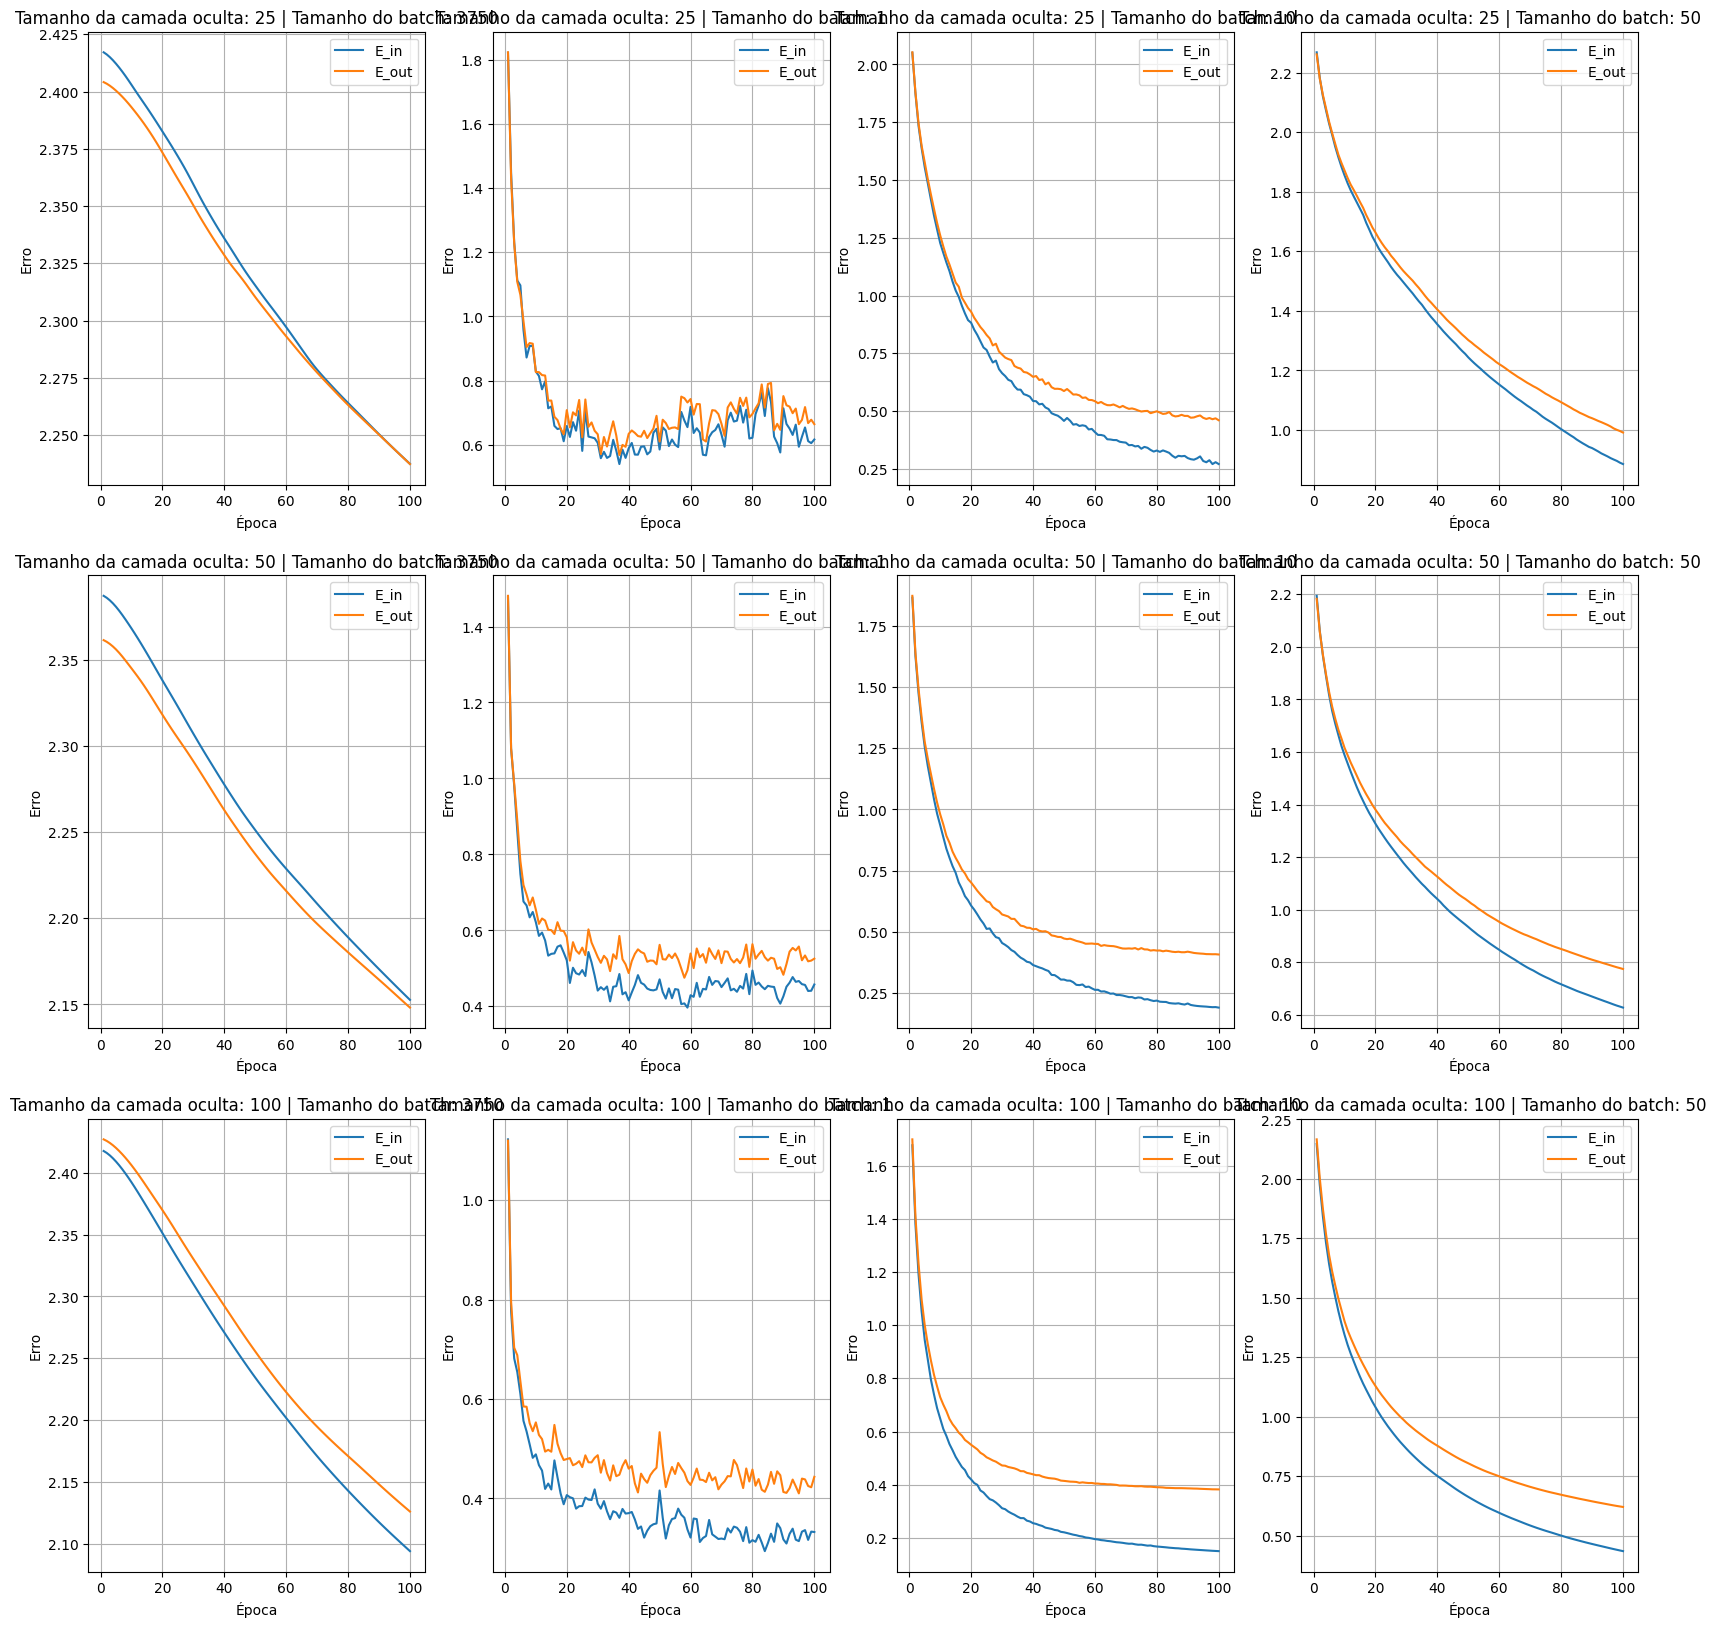

In [ ]:
fig, axs = plt.subplots(3, 4, figsize=(20,20))
eixo_x = list(range(1, 101))

for i in range(3):
    for j in range(4):
        erro_treino, erro_teste = calcula_loss(X_train, y_train, X_test, y_test, tamanho_hidden=tamanhos_hidden[i], taxa_aprendizado=0.0001,
                                               tamanho_batch=tamanhos_batch[j])

        axs[i,j].plot(eixo_x, erro_treino, label='E_in')
        axs[i,j].plot(eixo_x, erro_teste, label='E_out')

        axs[i,j].set_xlabel('Época')
        axs[i,j].set_ylabel('Erro')
        axs[i,j].set_title('Tamanho da camada oculta: '+str(tamanhos_hidden[i])+' | Tamanho do batch: '+str(tamanhos_batch[j]))

        axs[i,j].legend()
        axs[i,j].grid()

### Análise
A quantidade de neurônios na camada oculta que garantiu menor erro empírico foi 100, o que indica uma maior complexidade nos dados, já que neurônios adicionais fornecem mais representações e flexibilidade para capturar padrões e características mais intricadas nos dados de treinamento. Importante ressaltar que diminuiu o erro mas ainda não levou a overfitting, pelo menos com 100 épocas, sendo que a maioria dos gráficos tem aspecto de uma boa taxa de aprendizado.